In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data=pd.read_csv("/content/Housing.csv")

In [13]:


# Display the first few rows
print(data.head())

# Check for missing values
print(data.info())
print(data.isnull().sum())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [14]:
# Example: Filling missing numerical values with mean
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)

# Example: Filling missing categorical values with mode
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)


<ipython-input-14-4a20905047fe>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-14-4a20905047fe>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoders if needed for inverse transformation

# Separate features (X) and target variable (y)
X = data.drop('price', axis=1)
y = data['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.000000    0.000

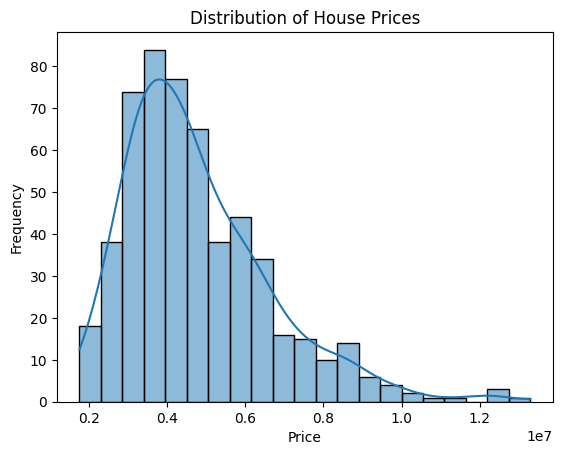

In [16]:
# Statistical summary
print(data.describe())

# Check distribution of target variable (price)
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


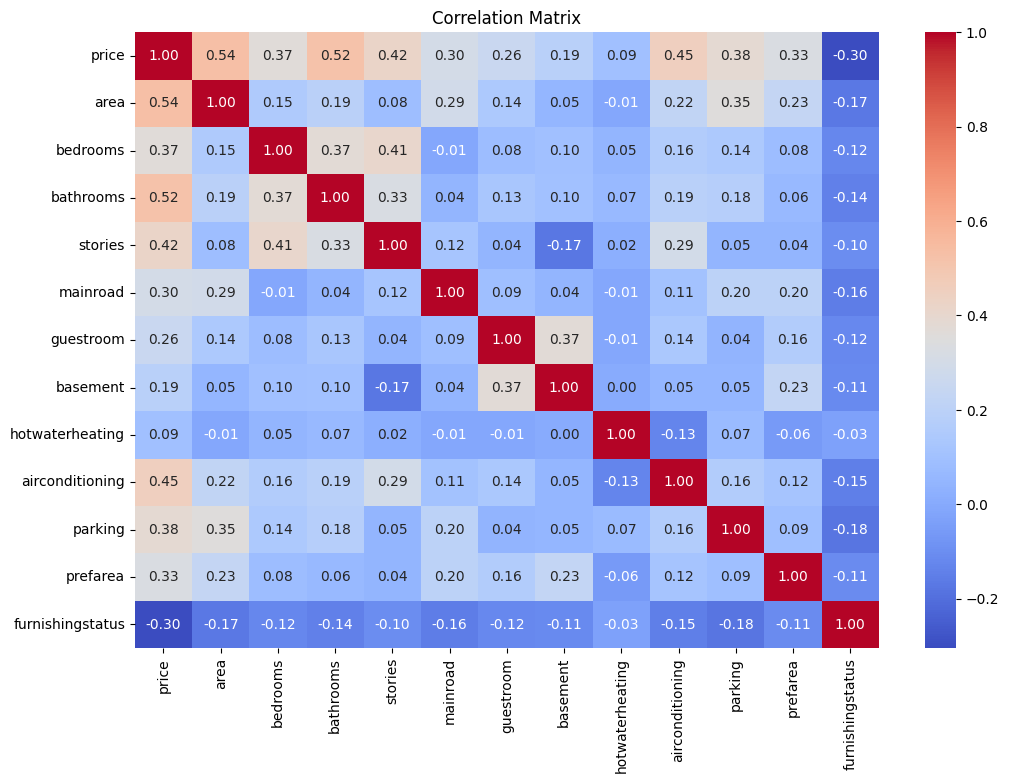

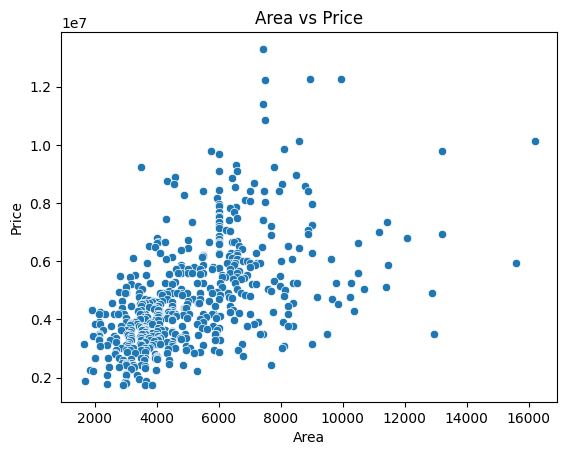

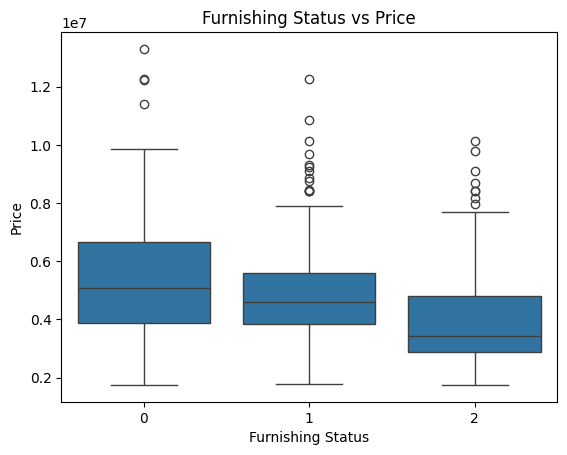

In [17]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Scatter plot of area vs. price
sns.scatterplot(x=data['area'], y=data['price'])
plt.title("Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

# Box plot for categorical features (e.g., furnishingstatus)
sns.boxplot(x=data['furnishingstatus'], y=data['price'])
plt.title("Furnishing Status vs Price")
plt.xlabel("Furnishing Status")
plt.ylabel("Price")
plt.show()


In [18]:
# Correlation with target variable
corr_with_price = data.corr()['price'].sort_values(ascending=False)
print("Correlation with price:\n", corr_with_price)

# Highlight key features
key_features = corr_with_price[corr_with_price > 0.3].index.tolist()
print("Key features with strong correlation:\n", key_features)


Correlation with price:
 price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64
Key features with strong correlation:
 ['price', 'area', 'bathrooms', 'airconditioning', 'stories', 'parking', 'bedrooms', 'prefarea']


**Observations**

There is a reasonable correlation between price and area and price and bathroom.
Bedroom , stories and Air conditioning also show a reasonable correlation with price. Features like parking and the same Main road show weaker correlations.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Perform 5-fold cross-validation
linear_cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("Linear Regression CV MSE:", -linear_cv_scores.mean())
print("Random Forest CV MSE:", -rf_cv_scores.mean())


Linear Regression CV MSE: 1063363032597.5745
Random Forest CV MSE: 1225985970299.5796


In [20]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV MSE:", -grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best CV MSE: 1199598338407.3481


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Train the models on the training set
linear_model.fit(X_train, y_train)
rf_best_model = grid_search.best_estimator_
rf_best_model.fit(X_train, y_train)

# Make predictions
linear_preds = linear_model.predict(X_test)
rf_preds = rf_best_model.predict(X_test)

# Evaluate models
linear_mse = mean_squared_error(y_test, linear_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

linear_r2 = r2_score(y_test, linear_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("Linear Regression - MSE:", linear_mse, ", R2 Score:", linear_r2)
print("Random Forest - MSE:", rf_mse, ", R2 Score:", rf_r2)


Linear Regression - MSE: 1771751116594.0352 , R2 Score: 0.6494754192267803
Random Forest - MSE: 2059455562710.1562 , R2 Score: 0.5925557540340127


The lower MSE and higher R2 score of linear regression shows that this data follows more linear path than nonlinear thus we should use linear regression.
Hyperparameter tuning on the Random forest has reduced its mse value but not less than mse of linear regression.

## Exploratory Data Analysis (EDA)
In this section, we explored the dataset to identify patterns and relationships.
Key observations:
- Area and bathroom is strongly correlated with house prices.
- Features like air conditioning and furnishing status influence prices.

## Model Implementation
We compared two models:
- Linear Regression
- Random Forest with hyperparameter tuning
Linear regression outperformed Random Forest based on MSE and R² scores.
